6th assignment

1) Please estimate a theoretical standard Hungarian university student's daily 95% VaR, and 1 year VaR 99% VaR events and if applicable, their monetary values. The text answers will be judged by the relevance of the example, they need not be personal or true for a concrete person.

The daily 95% VaR event means that during the day there is a only a 5% chance that the loss the next day will be greater than the given value. Such event could be when our university student needs a new pair of jeans because the current ones rip out. The estimated value for it is about $30 in Hungary.

The 1 year 99% VaR event is when our particular uni student has some student job, but a pandemic occurs. The student loses their job, since workplaces let the student workers go first. The monetary value depends on the field they are working in and the region they live in, but I would estimate it to be around $5000 for that year.

2) Download the daily closing price history of ZWACK from WSJ between 2010.01.01 and 2020.04.24. Plot the time series. Compute the daily absolute price return time series, and plot its cumulative distribution function. Determine the daily:

1. standard deviation

2. lower and upper VaR values at 99% confidence,

3. lower and upper CVaR values at 95% confidence,

4. expected shortfall value at 95% confidence

Summarize your observations on the usefullness of these quantities as a risk measure in a single paragraph.

In [1]:
%pylab inline
import pandas as pd
import numpy
import matplotlib
from scipy.stats import norm
import sympy as sp

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(12,4) #it only works nice if I tell it the figsize twice

In [3]:
prices = pd.read_csv("HistoricalPrices.csv", comment='#', header=0, parse_dates=[0])
dates = prices.iloc[:,0]
closes = prices.iloc[:,4]

prices[' Return'] = prices[' Close'] - prices[' Close'].shift()
returns = prices.iloc[:,6]

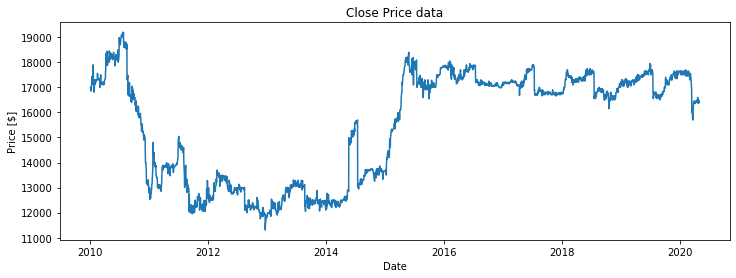

In [5]:
plot(dates, closes)
xlabel("Date")
ylabel("Price [$]")
title("Close Price data")
figsize(12,4)
show()

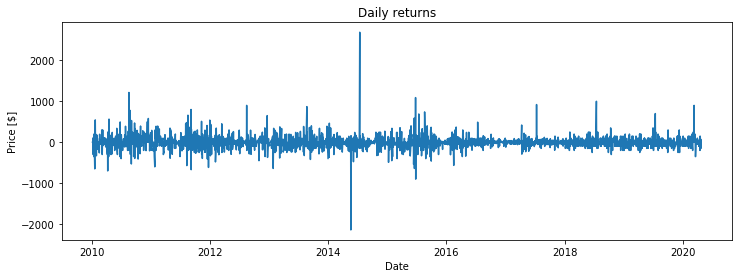

In [6]:
fig = figure()
plot(dates, returns)
xlabel("Date")
ylabel("Price [$]")
title("Daily returns")
show()

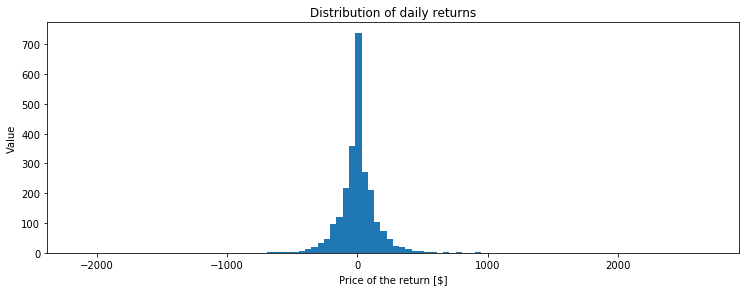

In [7]:
fig = figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
returns.plot.hist(bins = 100)
ax1.set_xlabel("Price of the return [$]")
ax1.set_ylabel("Value")
ax1.set_title("Distribution of daily returns")
show()

In [8]:
m = mean(returns[1:])
s = std(returns[1:])
a = 0.99

ret = array(returns[1:].sort_values(ascending = True))

The daily standard deviation is $167.9427


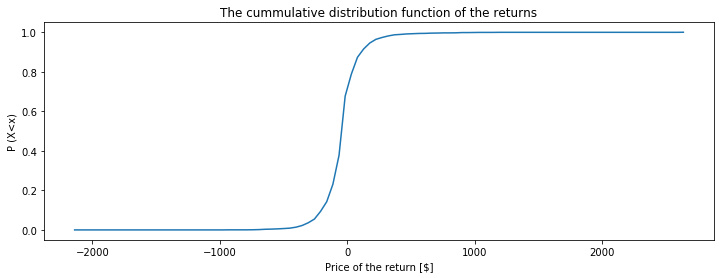

In [9]:
c, b = histogram(ret, bins = 100)
cumm = cumsum(c) / len(closes)
plot(b[:len(b) - 1], cumm) #plotting the cummulative distribution function
title('The cummulative distribution function of the returns')
xlabel('Price of the return [$]')
ylabel('P (X<x)')
print('The daily standard deviation is $%.4f' %s)
show()

In [10]:
var99 = norm.ppf(1-a, m, s)

upvari = where(ret < var99)[0][-1]
lowvari = where(ret > var99)[0][0]

upvar = - ret[upvari]
lowvar = - ret[lowvari]
print('The lower VaR is $%i, and the upper VaR is $%i at %.2f confidence.' %(lowvar, upvar, a))

The lower VaR is $390, and the upper VaR is $395 at 0.99 confidence.


In [22]:
a = 0.95
var95 = norm.ppf(1-a, m, s)

upvari = where(ret < var95)[0][-1]
lowvari = where(ret > var95)[0][0]

upvar = - ret[upvari]
lowvar = - ret[lowvari]

upcvari = where(ret <= - upvar)[0]
lowcvari = where(ret <= - lowvar)[0]

upcvar = ret[upcvari]
lowcvar = ret[lowcvari]

In [23]:
def gauss(x, mu, sigma):
    return exp(- ((x - mu) / sigma) ** 2 / 2) / (sigma * sqrt(2 * pi))

ucvar = - sum(upcvar * gauss(upcvar, m, s)) / sum(gauss(upcvar, m, s))
lcvar = - sum(lowcvar * gauss(lowcvar, m, s)) / sum(gauss(lowcvar, m, s))

print('The lower CVaR is $%.2f, and the upper CVaR is $%.2f at %.2f confidence.' %(lcvar, ucvar, a))

The lower CVaR is $314.53, and the upper CVaR is $318.15 at 0.95 confidence.


In [24]:
x = sp.Symbol('x')
alpha = sp.Symbol('\\alpha')
mu = sp.Symbol('\\mu')
sigma = sp.Symbol('\\sigma')

In [25]:
cv = sp.integrate((x * sp.exp(-((x - mu) / sigma) ** 2 / 2) / (sigma * sp.sqrt(2 * sp.pi))), (x, - sp.oo, var95))
es = (cv / (1 - alpha)).evalf(subs = {alpha: a, mu: m, sigma: s})
print('The expected shortfall is $%.2f at %.2f confidence.' %(-es, a))

The expected shortfall is $346.17 at 0.95 confidence.


We wanted the expected shortfall to be the same value as (at least) one of the CVaR values. This is not happening in my notebook because I counted the expected shortfall for a continuous case and the CVaR values for a discrete distribution. But the latter ones correspond to the value of the former one in a continuous case.

With the help of the VaR values we can estimate the maximum possible loss of our investment in a given period of time, but we exclude the worst scenarios of our countings. We give the amount of the probability of this exclusion with the confidence level.  With CVaR / expected shortfall we do not consider only the worst outcomes, but the less profitable ones. It is the mean loss given that it is occurring below a given probability value which we also adjust with the confidence level.